# (1) Import of needed libraries

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag

import gensim
from gensim import corpora

from gensim.models import TfidfModel
import numpy as np

from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

from gensim.models.ldamodel import LdaModel
from pprint import pprint

from gensim.models import HdpModel

# (2) Import of complaint data

In [2]:
df = pd.read_csv('complaints.csv',dtype = {'ZIP code': str})

pd.set_option('display.max_colwidth', None)

df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TX,78541,Servicemember,NaN,Web,2022-11-19,In progress,Yes,NaN,6222374
1,2022-10-13,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,"In accordance with the fair credit reporting act XXXX account XXXX XXXX # XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Has violated my rights,15 U.S.C.1681 section 602 A states that I have a right to my privacy. 1 5 U.S.C. 1681 section 602 A section 2 states a consumer reporting company can not furnish an account without my written instructions which I have never given.",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30043,NaN,Consent provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6079679
2,2022-10-13,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,"This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Again, I was going through my records & noticed the fraudulent accounts which do not belong to me STILL reposting on my file in Transunion. The other bureaus have already DELETED this fraudulent information so my question is why do you still report these damaging records? I also contacted XXXX XXXX XXXX and then talked to their staff, and they agreed to remove the accounts from my file. I have already disputed these accounts several times and stated that I am an identity theft victim. I even forwarded my FTC report I filed online on their website along with my personal information and documents but still, you chose to continue reporting these accounts. Credit Bureaus are bound to comply with the FCRA regulation section 605b but you never cared nor paid any attention to my Disputes. You became negligent of the FCRA law and continued reporting this information on my Credit File without Proper Verification or Investigation. Now, I want you to REMOVE these items from my file like the other bureaus have done. \n\nXXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90660,NaN,Consent provided,Web,2022-10-13,Closed with non-monetary relief,Yes,NaN,6076990
3,2022-10-12,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19148,NaN,Consent not provided,Web,2022-10-12,Closed with non-monetary relief,Yes,NaN,6080312
4,2022-11-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Na

# (3) Data Pre-Processing

## (3.1.a) Data Filtering (1/2)

Number of documents: 1164


<Axes: xlabel='Product'>

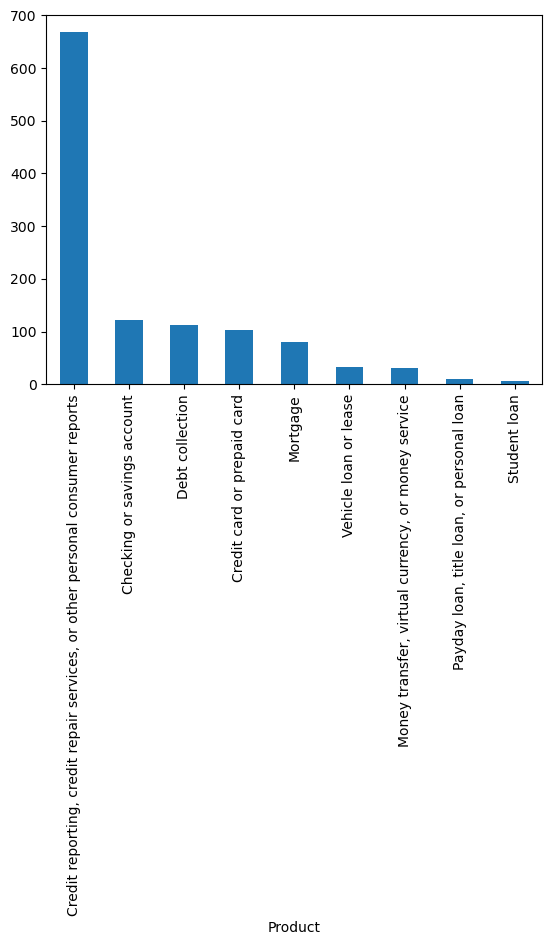

In [3]:
df = df[['Date received', 'Product','Consumer complaint narrative']]
df['Date received']= pd.to_datetime(df['Date received'])

df = df[df['Consumer complaint narrative'].notna()]

df = df[(df['Date received'].dt.year == 2022) & (df['Date received'].dt.month == 11)]

print("Number of documents:", len(df))

df['Product'].value_counts().plot(kind='bar')

## (3.1.b) Data Filtering (2/2)

In [4]:
df = df[(df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports') ]
print("Number of documents:", len(df))

Number of documents: 668


## (3.2) Tokenization including removal of stopwords, capitalization & filtering on alphabetic data

In [5]:
stopwords = stopwords.words('english') + ["xx", "xxxx","im","please","xxxxxxxx"]

def tokenize (column):
    token_data = nltk.word_tokenize(column)
    return [w.lower() for w in token_data if w.lower() not in stopwords and w.isalpha() and len(w)>2]


df['token_data'] = df['Consumer complaint narrative'].apply(lambda x: tokenize(x))

df.head()

,Date received,Product,Consumer complaint narrative,token_data
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]"
265,2022-11-05,"Credit reporting, credit repair services, or other personal consumer reports","My name is XXXX XXXX this complaint is not made in error neither is it being made by a third party.I declare under penalty of perjury I am alleging that a person or company- without my authorization- from unauthorized use of my social security number and card used my personal identifying information to apply for goods, services, or money ; and, was successful in creating some accounts. I have no knowledge of this and All is being investigated by the FTC.","[name, complaint, made, error, neither, made, third, declare, penalty, perjury, alleging, person, without, unauthorized, use, social, security, number,

## (3.3.a) Lemmatization (without POS)

In [6]:
#lm = WordNetLemmatizer()

#df['lemmatized_tokens'] = df['token_data'].apply(lambda token_list: [lm.lemmatize(token) for token in token_list])

#df.head()

## (3.3.b) Lemmatization (with POS)

In [7]:
#df['Pos_Tag'] = df['token_data'].apply(lambda token_list: nltk.pos_tag(token_list))

#def lemmatize_with_pos(token_list):
    #lemmatized_tokens = []
    #for token, tag in token_list:
        #if tag.startswith('N'):  # Noun
            #lemmatized_tokens.append(lm.lemmatize(token, 'n'))
        #elif tag.startswith('V'):  # Verb
            #lemmatized_tokens.append(lm.lemmatize(token, 'v'))
        #elif tag.startswith('R'):  # Adverb
            #lemmatized_tokens.append(lm.lemmatize(token, 'r'))
        #elif tag.startswith('J'):  # Adjective
            #lemmatized_tokens.append(lm.lemmatize(token, 'a'))
        #else:
            #lemmatized_tokens.append(lm.lemmatize(token))
    #return lemmatized_tokens

#df['lemmatized_pos_tokens'] = df['Pos_Tag'].apply(lambda token_list: lemmatize_with_pos(token_list))

#df.drop('Pos_Tag', axis=1)

#df.head()

## (3.3.c) Lemmatization (with POS) including only nouns and adjectives

In [8]:
#df['Pos_Tag'] = df['token_data'].apply(lambda token_list: nltk.pos_tag(token_list))

#def lemmatize_nouns_adjectives(token_list):
    #lemmatized_tokens = []
    #for token, tag in token_list:
        #if tag.startswith('N') or tag.startswith('J'):
            #lemmatized_tokens.append(lm.lemmatize(token, pos = 'a' if tag.startswith('J') else 'n'))
    #return lemmatized_tokens

#df['lemmatized_pos_tokens']=df['Pos_Tag'].apply(lambda token_list: lemmatize_nouns_adjectives(token_list))

#df.drop('Pos_Tag', axis =1)

#df.head()

## (3.3.d) Stemming including filtering on nouns + adjectives only

In [9]:
def pos_tagging (token_data):
    pos_tags = pos_tag(token_data)
    filtered_tokens = [word for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J')]
    return filtered_tokens


def stemming (filtered_tokens):
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(word) for word in filtered_tokens]
    return tokens_stemmed

df['filtered_data']=df['token_data'].apply(pos_tagging)

df['stemmed_data']=df['filtered_data'].apply(stemming)

df.head()

,Date received,Product,Consumer complaint narrative,token_data,filtered_data,stemmed_data
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]","[several, inaccurate, personal, information, credit, report, difficulties, fraud, error, credit, reporting]","[sever, inaccur, person, inform, credit, report, difficulti, fraud, error, credit, report]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]","[duplicate, complaint, third, party, filing, complaint, complaint, letter, law, multiple, requests, account, credit, report, violation, federal, law, section, consumers, information, file, sources, report, recipients, experian, request, subject, consumer, consumer, file, requests, social, security, number, similar, identification, number, consumer, disclosure, consumer, reporting, agency, appropriate, proof, identity, requester, consumer, reporting, agency, number, disclo

## (3.4) n-gram Implementation

In [10]:
def bigrams(text):
    bigram = gensim.models.Phrases(text)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return [bigram_mod[doc] for doc in text]

df['stemmed_data']=df['stemmed_data'].apply(lambda x:[x])
df['bigrams']=df['stemmed_data'].apply(bigrams)

df['bigrams']=[item for sublist in df['bigrams'] for item in sublist]

df.head()

,Date received,Product,Consumer complaint narrative,token_data,filtered_data,stemmed_data,bigrams
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]","[several, inaccurate, personal, information, credit, report, difficulties, fraud, error, credit, reporting]","[[sever, inaccur, person, inform, credit, report, difficulti, fraud, error, credit, report]]","[sever, inaccur, person, inform, credit, report, difficulti, fraud, error, credit, report]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]","[duplicate, complaint, third, party, filing, complaint, complaint, letter, law, multiple, requests, account, credit, report, violation, federal, law, section, consumers, information, file, sources, report, recipients, experian, request, subject, consumer, consumer, file, requests, social, security, number, similar, identification, number, consumer, disclosure, consumer, 

## (3.5) Final pre-processed data

Top 50 most common words:
[('report', 1420), ('credit', 1299), ('account', 950), ('inform', 847), ('consum', 672), ('section', 388), ('item', 374), ('experian', 333), ('inquiri', 333), ('agenc', 326), ('bureau', 300), ('date', 273), ('file', 263), ('law', 236), ('letter', 219), ('compani', 218), ('person', 212), ('ident', 203), ('disput', 201), ('balanc', 187), ('state', 182), ('right', 170), ('payment', 168), ('inaccur', 158), ('complaint', 158), ('record', 153), ('theft', 153), ('creditor', 150), ('time', 144), ('usc', 142), ('day', 142), ('act', 139), ('request', 134), ('name', 134), ('violat', 131), ('number', 129), ('fcra', 127), ('address', 124), ('fair', 123), ('delet', 112), ('document', 109), ('furnish', 105), ('investig', 104), ('valid', 101), ('respons', 99), ('accord', 98), ('feder', 95), ('privaci', 94), ('card', 93), ('due', 88)]


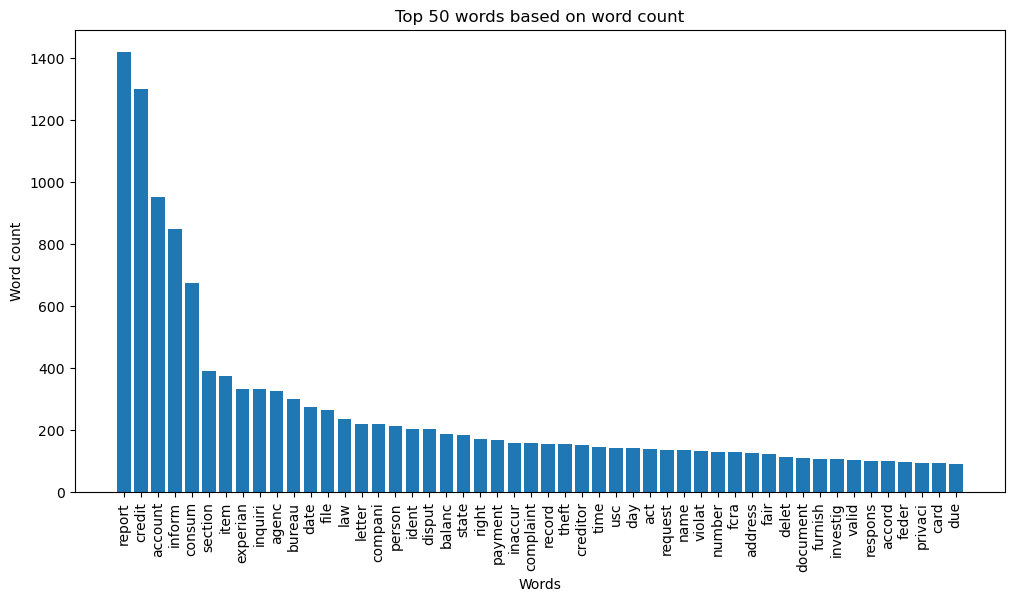

Top 50 words based on word count and their frequency:
{'report': 2.125748502994012, 'credit': 1.9446107784431137, 'account': 1.4221556886227544, 'inform': 1.2679640718562875, 'consum': 1.0059880239520957, 'section': 0.5808383233532934, 'item': 0.5598802395209581, 'experian': 0.49850299401197606, 'inquiri': 0.49850299401197606, 'agenc': 0.4880239520958084, 'bureau': 0.4491017964071856, 'date': 0.4086826347305389, 'file': 0.3937125748502994, 'law': 0.3532934131736527, 'letter': 0.3278443113772455, 'compani': 0.3263473053892216, 'person': 0.31736526946107785, 'ident': 0.30389221556886226, 'disput': 0.3008982035928144, 'balanc': 0.27994011976047906, 'state': 0.27245508982035926, 'right': 0.25449101796407186, 'payment': 0.25149700598802394, 'inaccur': 0.23652694610778444, 'complaint': 0.23652694610778444, 'record': 0.22904191616766467, 'theft': 0.22904191616766467, 'creditor': 0.2245508982035928, 'time': 0.2155688622754491, 'usc': 0.2125748502994012, 'day': 0.2125748502994012, 'act': 0.2080

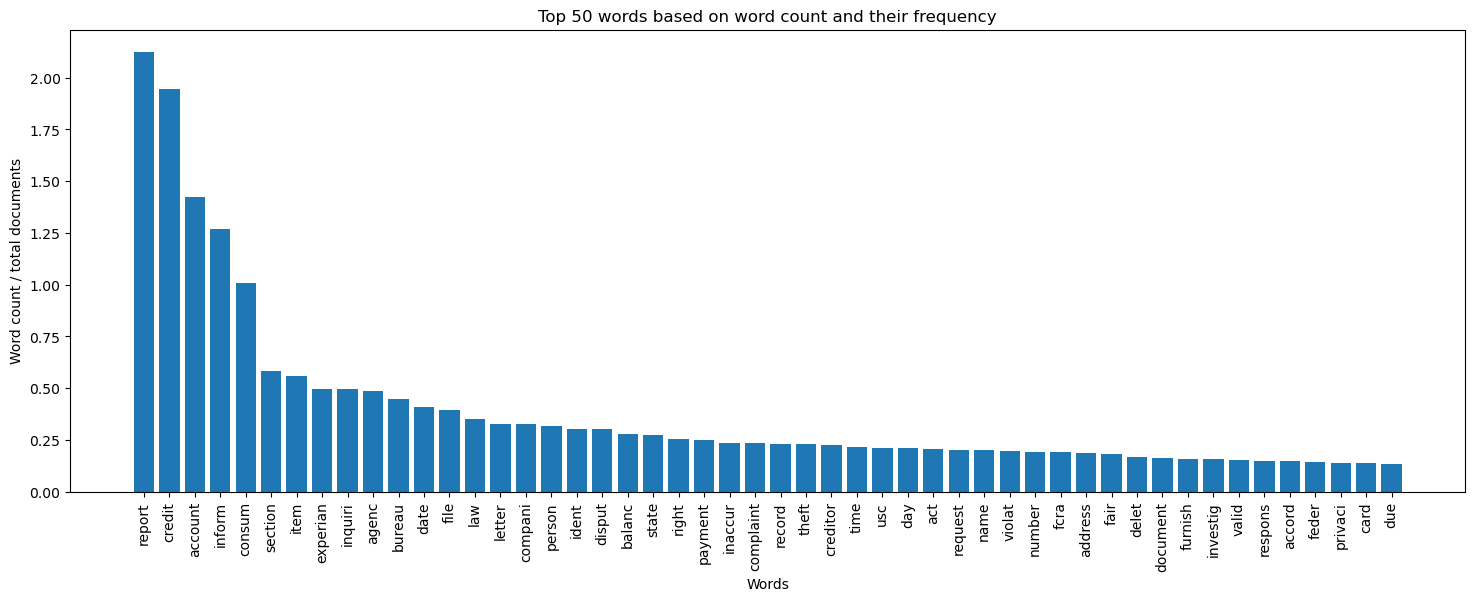

In [11]:
corpus_Top50 = df['bigrams'].tolist()

list_of_lists = [word for sublist in corpus_Top50 for word in sublist]

word_freq = FreqDist(list_of_lists)
top_50_words = dict(word_freq.most_common(50))

print("Top 50 most common words:")
print(word_freq.most_common(50))

plt.figure(figsize=(12,6))
plt.bar(top_50_words.keys(), top_50_words.values())
plt.xticks(rotation='vertical')
plt.title('Top 50 words based on word count')
plt.xlabel('Words')
plt.ylabel('Word count')
plt.show()

no_documents = len(df)

word_freq_share = {word: freq / no_documents for word, freq in top_50_words.items()}
print("Top 50 words based on word count and their frequency:")
print(word_freq_share)


plt.figure(figsize=(18,6))
plt.bar(list(word_freq_share.keys())[:50], list(word_freq_share.values())[:50])
plt.xticks(rotation='vertical')
plt.title('Top 50 words based on word count and their frequency')
plt.xlabel('Words')
plt.ylabel('Word count / total documents')
plt.show()

In [12]:
frequency_threshold = 0.5

tokenized_data = df['bigrams']

list_tokenized_data = df['bigrams'].tolist()
list_of_lists_full = [word for sublist in list_tokenized_data for word in sublist]

word_freq_full = FreqDist(list_of_lists_full)

words_full = dict(word_freq_full)

no_documents_full = len(df)

word_freq_share_full = {word: freq / no_documents_full for word, freq in words_full.items()}

filtered_data = [[word for word in doc if word_freq_share_full[word] <= frequency_threshold] for doc in tokenized_data]

# (4) Vectorization

## (4.1) BoW

In [13]:
corpus = filtered_data
dictionary = corpora.Dictionary(corpus)

dictionary.filter_extremes(no_below=10, no_above=0.95)

bow = [dictionary.doc2bow(text) for text in corpus] 

id_words_bow = [[(dictionary[id], count) for id, count in line] for line in bow]

print(id_words_bow[:5])

[[('error', 1), ('fraud', 1), ('inaccur', 1), ('person', 1), ('sever', 1)], [('inaccur', 1), ('accord', 1), ('accuraci', 2), ('agenc', 4), ('appropri', 1), ('case', 1), ('charg', 1), ('complaint', 3), ('complet', 1), ('conduct', 1), ('creditor', 2), ('current', 1), ('date', 1), ('delet', 1), ('determin', 1), ('disclosur', 2), ('disput', 1), ('end', 1), ('experian', 2), ('feder', 1), ('file', 5), ('free', 1), ('ident', 1), ('identif', 1), ('law', 2), ('letter', 1), ('multipl', 1), ('notifi', 1), ('number', 3), ('paragraph', 1), ('parti', 1), ('period', 1), ('procedur', 1), ('proof', 1), ('reason', 1), ('recipi', 1), ('record', 1), ('reinvestig', 2), ('request', 4), ('secur', 1), ('similar', 1), ('social', 1), ('sourc', 1), ('statu', 1), ('subject', 1), ('third', 1), ('violat', 1)], [('error', 1), ('person', 2), ('complaint', 1), ('number', 1), ('secur', 1), ('social', 1), ('third', 1), ('card', 1), ('declar', 1), ('ftc', 1), ('good', 1), ('identifi', 1), ('knowledg', 1), ('money', 1), (

## (4.2) TF-IDF 

In [14]:
tfidf_model = TfidfModel(dictionary=dictionary, smartirs='ntc')
tfidf = [tfidf_model[dictionary.doc2bow(text)] for text in corpus]

id_words_tfidf = [[(dictionary[id], np.around(freq,decimals=2)) for id, freq in line] for line in tfidf_model[bow]]

print(id_words_tfidf[:5])

[[('error', 0.56), ('fraud', 0.51), ('inaccur', 0.32), ('person', 0.31), ('sever', 0.48)], [('inaccur', 0.06), ('accord', 0.07), ('accuraci', 0.2), ('agenc', 0.2), ('appropri', 0.12), ('case', 0.12), ('charg', 0.12), ('complaint', 0.19), ('complet', 0.1), ('conduct', 0.12), ('creditor', 0.15), ('current', 0.11), ('date', 0.07), ('delet', 0.09), ('determin', 0.13), ('disclosur', 0.3), ('disput', 0.06), ('end', 0.11), ('experian', 0.11), ('feder', 0.08), ('file', 0.3), ('free', 0.14), ('ident', 0.07), ('identif', 0.12), ('law', 0.12), ('letter', 0.05), ('multipl', 0.11), ('notifi', 0.14), ('number', 0.25), ('paragraph', 0.13), ('parti', 0.09), ('period', 0.12), ('procedur', 0.13), ('proof', 0.08), ('reason', 0.1), ('recipi', 0.16), ('record', 0.08), ('reinvestig', 0.25), ('request', 0.32), ('secur', 0.11), ('similar', 0.15), ('social', 0.11), ('sourc', 0.14), ('statu', 0.11), ('subject', 0.12), ('third', 0.1), ('violat', 0.08)], [('error', 0.22), ('person', 0.24), ('complaint', 0.13), ('

# (5) Topic Modeling

## (5.1) Latent Semantic Analysis (LSA) / Latent Semantic Indexing (LSI) with BoW

Coherence score with 2 clusters: 0.40232116157322184
Coherence score with 3 clusters: 0.46093594540233607
Coherence score with 4 clusters: 0.5305162201708699
Coherence score with 5 clusters: 0.4731217088902004
Coherence score with 6 clusters: 0.4759546394433722
Coherence score with 7 clusters: 0.521363485385057
Coherence score with 8 clusters: 0.549676067912179
Coherence score with 9 clusters: 0.4987715184195866
Coherence score with 10 clusters: 0.49482577243763465
Coherence score with 11 clusters: 0.48798605499816805
Coherence score with 12 clusters: 0.5154168482846082
Coherence score with 13 clusters: 0.47641293373567856
Coherence score with 14 clusters: 0.46268723361300224
Coherence score with 15 clusters: 0.4850812805054457
Coherence score with 16 clusters: 0.4694503781744381
Coherence score with 17 clusters: 0.45377421062086903
Coherence score with 18 clusters: 0.4673298512166095
Coherence score with 19 clusters: 0.43612369271548596
Coherence score with 20 clusters: 0.440099258388

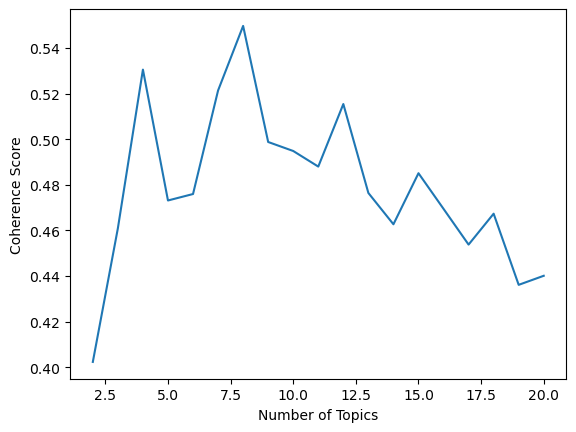

8


In [15]:
df['Assigned_topic_lsi_bow'] = None
df['Topic_score_lsi_bow'] = None


topics = []
score=[]

for i in range(2,21):
    lsi = LsiModel(bow, num_topics = i, id2word = dictionary, power_iters=10)
    coherence_model = CoherenceModel(model=lsi, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))
    
    topics.append(i)
    score.append(coherence_model.get_coherence())
    
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict = dict(zip(topics, score))
max_dict = max(zip(topic_score_dict.values(),topic_score_dict.keys()))[1]
print(max_dict)

In [16]:
lsi_bow = LsiModel(bow, num_topics=max_dict, id2word=dictionary,power_iters=5)

for topic_num, words in lsi_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.892*"inquiri" + 0.440*"date" + 0.030*"unauthor" + 0.029*"bureau" + 0.029*"consent" + 0.026*"experian" + 0.021*"letter" + 0.020*"investig" + 0.020*"delet" + 0.019*"number".
Words in 1: 0.313*"experian" + 0.276*"file" + 0.253*"agenc" + 0.252*"law" + 0.207*"bureau" + 0.181*"disput" + 0.172*"ident" + 0.163*"state" + 0.158*"request" + 0.143*"record".
Words in 2: -0.320*"experian" + 0.291*"ident" + -0.255*"last" + 0.220*"theft" + -0.213*"activ" + -0.198*"delet" + 0.194*"file" + -0.186*"differ" + 0.181*"agenc" + -0.177*"request".
Words in 3: -0.283*"date" + -0.233*"last" + 0.232*"experian" + 0.230*"person" + -0.200*"term" + 0.195*"right" + -0.194*"activ" + 0.191*"usc" + -0.187*"balanc" + -0.183*"differ".
Words in 4: 0.512*"experian" + -0.278*"payment" + -0.242*"agenc" + -0.235*"person" + -0.230*"state" + 0.226*"disput" + -0.220*"usc" + 0.192*"law" + -0.142*"privaci" + 0.139*"file".
Words in 5: 0.424*"agenc" + -0.288*"payment" + -0.270*"compani" + -0.213*"due" + 0.196*"date" + 0.

## (5.2) Latent Semantic Analysis (LSA) / Latent Semantic Indexing (LSI) with Tf-Idf

Coherence score with 2 clusters: 0.4546234196495621
Coherence score with 3 clusters: 0.5223740442192267
Coherence score with 4 clusters: 0.5593637360374419
Coherence score with 5 clusters: 0.5139389440005859
Coherence score with 6 clusters: 0.4805612452867655
Coherence score with 7 clusters: 0.42235989192150564
Coherence score with 8 clusters: 0.41008293547791785
Coherence score with 9 clusters: 0.4353570711372845
Coherence score with 10 clusters: 0.4270799372838
Coherence score with 11 clusters: 0.4129240309829951
Coherence score with 12 clusters: 0.41472138876832854
Coherence score with 13 clusters: 0.40297338646117126
Coherence score with 14 clusters: 0.4026359814746561
Coherence score with 15 clusters: 0.3980014755379014
Coherence score with 16 clusters: 0.38650131645761054
Coherence score with 17 clusters: 0.36682249639925174
Coherence score with 18 clusters: 0.3794056334551137
Coherence score with 19 clusters: 0.38614955195204886
Coherence score with 20 clusters: 0.34794553710142

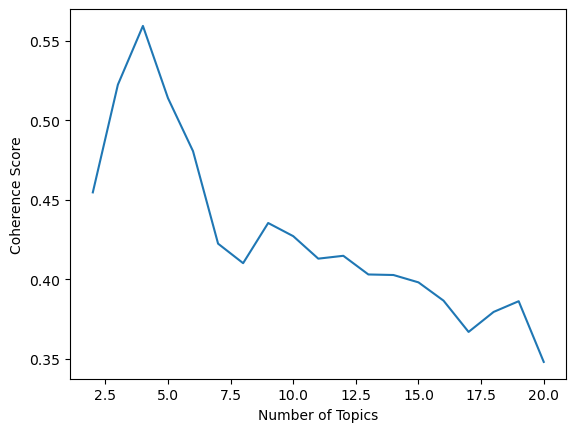

4
Words in 0: 0.239*"agenc" + 0.201*"state" + 0.188*"right" + 0.177*"privaci" + 0.169*"furnish" + 0.169*"usc" + 0.166*"act" + 0.161*"instruct" + 0.159*"fair" + 0.159*"experian".
Words in 1: -0.295*"privaci" + -0.289*"instruct" + -0.274*"furnish" + -0.250*"state" + -0.238*"right" + -0.224*"accord" + -0.218*"fair" + -0.214*"act" + 0.186*"inquiri" + -0.175*"agenc".
Words in 2: -0.766*"inquiri" + -0.245*"hard" + -0.217*"unauthor" + -0.176*"compani" + 0.131*"balanc" + 0.127*"ident" + 0.118*"theft" + 0.118*"law" + 0.115*"file" + 0.087*"valid".
Words in 3: -0.302*"letter" + -0.295*"name" + -0.291*"involv" + -0.289*"gotten" + -0.275*"review" + -0.263*"sure" + -0.256*"third" + -0.241*"mail" + -0.229*"respons" + -0.200*"parti".


In [18]:

topics_LSI_tfidf = []
score_LSI_tfidf=[]

for i in range(2,21):
    lsi_tfidf = LsiModel(tfidf, num_topics = i, id2word = dictionary, power_iters = 10)
    coherence_model_tfidf = CoherenceModel(model=lsi_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_tfidf = coherence_model_tfidf.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_tfidf))
    
    topics_LSI_tfidf.append(i)
    score_LSI_tfidf.append(coherence_model_tfidf.get_coherence())
    
_=plt.plot(topics_LSI_tfidf, score_LSI_tfidf)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_tfidf = dict(zip(topics_LSI_tfidf, score_LSI_tfidf))
max_dict_tfidf = max(zip(topic_score_dict_tfidf.values(),topic_score_dict_tfidf.keys()))[1]
print(max_dict_tfidf)

lsi_tfidf = LsiModel(tfidf, num_topics=max_dict_tfidf, id2word=dictionary,power_iters=10)

# Show top 10 words of each of the n topics
for topic_num, words in lsi_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

In [19]:
lsi_tfidf = LsiModel(tfidf, num_topics=max_dict_tfidf, id2word=dictionary,power_iters=10)

for topic_num, words in lsi_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: -0.239*"agenc" + -0.201*"state" + -0.188*"right" + -0.177*"privaci" + -0.169*"furnish" + -0.169*"usc" + -0.166*"act" + -0.161*"instruct" + -0.159*"fair" + -0.159*"experian".
Words in 1: -0.295*"privaci" + -0.289*"instruct" + -0.274*"furnish" + -0.250*"state" + -0.238*"right" + -0.224*"accord" + -0.218*"fair" + -0.214*"act" + 0.186*"inquiri" + -0.175*"agenc".
Words in 2: -0.766*"inquiri" + -0.245*"hard" + -0.217*"unauthor" + -0.176*"compani" + 0.131*"balanc" + 0.127*"ident" + 0.118*"theft" + 0.118*"law" + 0.115*"file" + 0.087*"valid".
Words in 3: 0.302*"letter" + 0.295*"name" + 0.291*"involv" + 0.289*"gotten" + 0.275*"review" + 0.263*"sure" + 0.256*"third" + 0.241*"mail" + 0.229*"respons" + 0.200*"parti".


## (5.3) Latent Dirichlet Allocation (LDA) with BoW

Coherence score with 2 clusters: 0.3681448690734528
Coherence score with 3 clusters: 0.42120554137863847
Coherence score with 4 clusters: 0.4503398546722325
Coherence score with 5 clusters: 0.3965680327020499
Coherence score with 6 clusters: 0.4416985096101793
Coherence score with 7 clusters: 0.41554085452034945
Coherence score with 8 clusters: 0.4633246537710183
Coherence score with 9 clusters: 0.43565486870894304
Coherence score with 10 clusters: 0.4128087492027651
Coherence score with 11 clusters: 0.4283792431371909
Coherence score with 12 clusters: 0.4021275466294763
Coherence score with 13 clusters: 0.4369572606356099
Coherence score with 14 clusters: 0.4170132286976524
Coherence score with 15 clusters: 0.4344661206393333
Coherence score with 16 clusters: 0.43599392603553777
Coherence score with 17 clusters: 0.42718599354760806
Coherence score with 18 clusters: 0.4327956247108863
Coherence score with 19 clusters: 0.41976967493169015
Coherence score with 20 clusters: 0.423309704629

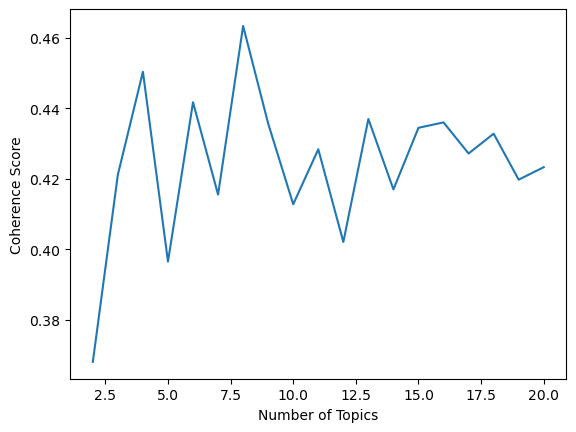

8


In [20]:
topics_LDA_bow = []
score_LDA_bow=[]

for i in range(2,21):
    lda_bow = LdaModel(corpus=bow,id2word=dictionary, num_topics = i, iterations = 100)
    coherence_model_lda_bow = CoherenceModel(model=lda_bow, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_lda_bow = coherence_model_lda_bow.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_lda_bow))
    
    topics_LDA_bow.append(i)
    score_LDA_bow.append(coherence_model_lda_bow.get_coherence())
    
_=plt.plot(topics_LDA_bow, score_LDA_bow)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_lda_bow = dict(zip(topics_LDA_bow, score_LDA_bow))
max_dict_lda_bow = max(zip(topic_score_dict_lda_bow.values(),topic_score_dict_lda_bow.keys()))[1]
print(max_dict_lda_bow)

In [21]:
lda_bow = LdaModel(corpus=bow,id2word=dictionary, num_topics = max_dict_lda_bow, iterations = 100)

for topic_num, words in lda_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.026*"ident" + 0.024*"balanc" + 0.023*"year" + 0.021*"polic" + 0.019*"theft" + 0.019*"time" + 0.018*"record" + 0.017*"compani" + 0.017*"payment" + 0.016*"fraudul".
Words in 1: 0.091*"inquiri" + 0.041*"date" + 0.032*"agenc" + 0.027*"right" + 0.027*"compani" + 0.025*"state" + 0.023*"person" + 0.022*"privaci" + 0.016*"furnish" + 0.016*"fair".
Words in 2: 0.041*"address" + 0.033*"complaint" + 0.027*"name" + 0.027*"person" + 0.025*"inaccur" + 0.021*"phone" + 0.020*"number" + 0.020*"letter" + 0.019*"card" + 0.018*"delet".
Words in 3: 0.041*"bureau" + 0.030*"letter" + 0.025*"law" + 0.024*"balanc" + 0.023*"agenc" + 0.023*"file" + 0.019*"date" + 0.015*"complaint" + 0.015*"ident" + 0.015*"request".
Words in 4: 0.025*"experian" + 0.023*"file" + 0.020*"inquiri" + 0.019*"record" + 0.019*"law" + 0.017*"date" + 0.016*"payment" + 0.016*"violat" + 0.016*"agenc" + 0.016*"bureau".
Words in 5: 0.041*"experian" + 0.032*"agenc" + 0.026*"ident" + 0.023*"file" + 0.023*"theft" + 0.019*"inaccur" + 

## (5.4) Latent Dirichlet Allocation (LDA) with Tf-Idf

Coherence score with 2 clusters: 0.36029311554386284
Coherence score with 3 clusters: 0.36745729819548806
Coherence score with 4 clusters: 0.40433169870336394
Coherence score with 5 clusters: 0.3847471150647336
Coherence score with 6 clusters: 0.36010042790544516
Coherence score with 7 clusters: 0.35979975313744833
Coherence score with 8 clusters: 0.3257414043204324
Coherence score with 9 clusters: 0.3349338129633905
Coherence score with 10 clusters: 0.3599321974924802
Coherence score with 11 clusters: 0.36234307674452215
Coherence score with 12 clusters: 0.33270318665163184
Coherence score with 13 clusters: 0.33175821172924186
Coherence score with 14 clusters: 0.34277624434145776
Coherence score with 15 clusters: 0.3216369694325298
Coherence score with 16 clusters: 0.34090984341992225
Coherence score with 17 clusters: 0.34192193469769366
Coherence score with 18 clusters: 0.32976204129139997
Coherence score with 19 clusters: 0.3357816375822934
Coherence score with 20 clusters: 0.319641

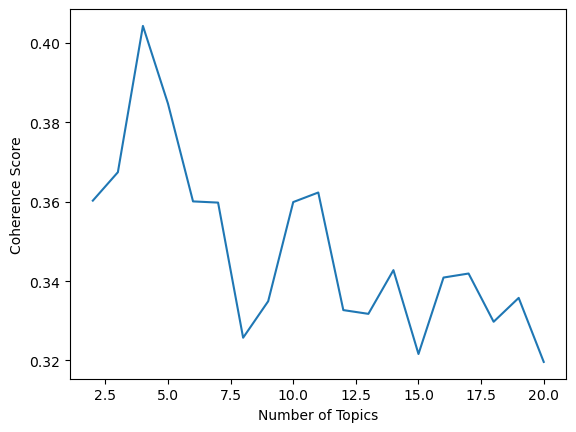

4


In [22]:
topics_LDA_tfidf = []
score_LDA_tfidf=[]

for i in range(2,21):
    lda_tfidf = LdaModel(corpus=tfidf,id2word=dictionary, num_topics = i, iterations = 100)
    coherence_model_lda_tfidf = CoherenceModel(model=lda_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_lda_tfidf))
    
    topics_LDA_tfidf.append(i)
    score_LDA_tfidf.append(coherence_model_lda_tfidf.get_coherence())
    
_=plt.plot(topics_LDA_tfidf, score_LDA_tfidf)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_lda_tfidf = dict(zip(topics_LDA_tfidf, score_LDA_tfidf))
max_dict_lda_tfidf = max(zip(topic_score_dict_lda_tfidf.values(),topic_score_dict_lda_tfidf.keys()))[1]
print(max_dict_lda_tfidf)

In [23]:
lda_tfidf = LdaModel(corpus=tfidf,id2word=dictionary, num_topics = max_dict_lda_tfidf, iterations = 100)

for topic_num, words in lda_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.022*"inquiri" + 0.017*"compani" + 0.015*"card" + 0.015*"fraud" + 0.013*"unauthor" + 0.013*"sever" + 0.012*"disput" + 0.012*"ident" + 0.011*"servic" + 0.011*"respons".
Words in 1: 0.014*"compani" + 0.013*"balanc" + 0.013*"ident" + 0.012*"person" + 0.012*"theft" + 0.012*"bureau" + 0.012*"inaccur" + 0.011*"payment" + 0.010*"date" + 0.010*"file".
Words in 2: 0.023*"experian" + 0.016*"letter" + 0.013*"agenc" + 0.012*"usc" + 0.012*"bureau" + 0.012*"balanc" + 0.012*"law" + 0.011*"disput" + 0.010*"investig" + 0.010*"violat".
Words in 3: 0.027*"inquiri" + 0.019*"state" + 0.019*"agenc" + 0.019*"privaci" + 0.018*"instruct" + 0.018*"address" + 0.018*"furnish" + 0.017*"accord" + 0.016*"right" + 0.014*"act".


## (5.5) Hierarchical Dirichlet Process (HDP) with BoW

In [24]:
hdp_bow = HdpModel(corpus=bow,id2word=dictionary)

for topic_num, words in hdp_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))
    
no_topics = topic_num

Words in 0: 0.020*valid + 0.014*unit + 0.014*busi + 0.014*loan + 0.013*hello + 0.013*bureau + 0.013*respons + 0.012*experian + 0.012*right + 0.011*document.
Words in 1: 0.017*use + 0.017*stickler + 0.017*compani + 0.016*ftc + 0.014*agenc + 0.013*experi + 0.012*agent + 0.012*numer + 0.012*possibl + 0.011*possess.
Words in 2: 0.019*amount + 0.018*confidenti + 0.014*legal + 0.013*third + 0.013*court + 0.013*letter + 0.012*game + 0.012*ident + 0.012*mine + 0.012*inspect.
Words in 3: 0.024*fee + 0.022*transact + 0.020*follow + 0.018*law + 0.015*applic + 0.013*hous + 0.012*purpos + 0.012*bill + 0.011*repres + 0.010*data.
Words in 4: 0.023*theft + 0.018*code + 0.017*requir + 0.017*best + 0.017*mani + 0.017*financi + 0.014*will + 0.013*abl + 0.012*way + 0.012*contract.
Words in 5: 0.020*transact + 0.019*hello + 0.016*request + 0.015*inaccur + 0.013*crime + 0.012*ive + 0.012*balanc + 0.012*payment + 0.010*email + 0.010*sever.
Words in 6: 0.019*right + 0.017*correct + 0.013*chang + 0.012*crimin 

In [25]:
coherence_model_hdp_bow = CoherenceModel(model=hdp_bow, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
coherence_score_hdp_bow = coherence_model_hdp_bow.get_coherence()
print('Coherence score with {} clusters: {}'.format(no_topics, coherence_score_hdp_bow))

Coherence score with 19 clusters: 0.396652001950903


## (5.6) Hierarchical Dirichlet Process (HDP) with Tf-Idf

In [26]:
hdp_tfidf = HdpModel(corpus=tfidf,id2word=dictionary)

for topic_num, words in hdp_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.019*offici + 0.017*line + 0.015*financi + 0.014*sourc + 0.013*extort + 0.013*third + 0.013*copi + 0.012*gotten + 0.012*loan + 0.012*purpos.
Words in 1: 0.022*inspect + 0.019*address + 0.016*author + 0.014*identif + 0.013*block + 0.012*identifi + 0.011*late + 0.011*repair + 0.011*consent + 0.011*secur.
Words in 2: 0.024*secur + 0.020*problem + 0.020*alleg + 0.014*similar + 0.014*take + 0.014*person + 0.013*inquiri + 0.013*gotten + 0.012*unauthor + 0.012*check.
Words in 3: 0.026*specif + 0.018*question + 0.017*email + 0.016*major + 0.016*request + 0.012*govern + 0.012*activ + 0.011*result + 0.010*hous + 0.010*life.
Words in 4: 0.032*lender + 0.024*doubt + 0.018*new + 0.014*mortgag + 0.013*product + 0.012*incomplet + 0.012*last + 0.011*code + 0.011*wrong + 0.010*declar.
Words in 5: 0.021*author + 0.020*notifi + 0.017*late + 0.016*use + 0.014*anyon + 0.013*court + 0.013*free + 0.013*provid + 0.013*number + 0.013*bureau.
Words in 6: 0.025*record + 0.017*date + 0.016*disclosur 

In [27]:
coherence_model_hdp_tfidf = CoherenceModel(model=hdp_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
coherence_score_hdp_tfidf = coherence_model_hdp_tfidf.get_coherence()
print('Coherence score with {} clusters: {}'.format(no_topics, coherence_score_hdp_tfidf))

Coherence score with 19 clusters: 0.4062799923121555
